<a href="https://colab.research.google.com/github/emilyjiminroh/2022_ai_winter_study/blob/main/RNN/%5BRNN(LSTM)%2BCNN%5D%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu==1.15.0
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

     |████████████████████████████████| 411.5 MB 7.7 kB/s 
     |████████████████████████████████| 503 kB 54.0 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
     |████████████████████████████████| 3.8 MB 49.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires tensorboard<2.9,>=2.8, but you have tensorboard 1.15.0 which is incompatible.
tensorflow-probability 0.15.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(3)

In [3]:
# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

17465344/17464789 [==============================] - 1s 0us/step


/tensorflow-1.15.2/python3.7/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/tensorflow-1.15.2/python3.7/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
# 원-핫 인코딩 생략 => 긍정, 부정 두 가지 값만 존재하므로 0 혹은 1로 나타낼 수 있다. 

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [5]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
______________________________________

In [6]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 38s 2ms/step - loss: 0.4513 - accuracy: 0.7674 - val_loss: 0.3345 - val_accuracy: 0.8527
Epoch 2/5
25000/25000 [==============================] - 33s 1ms/step - loss: 0.2877 - accuracy: 0.8789 - val_loss: 0.3268 - val_accuracy: 0.8593
Epoch 3/5
25000/25000 [==============================] - 33s 1ms/step - loss: 0.2466 - accuracy: 0.9013 - val_loss: 0.3340 - val_accuracy: 0.8572
Epoch 4/5
25000/25000 [==============================] - 33s 1ms/step - loss: 0.2080 - accuracy: 0.9189 - val_loss: 0.3482 - val_accuracy: 0.8542
Epoch 5/5
25000/25000 [==============================] - 32s 1ms/step - loss: 0.1782 - accuracy: 0.9310 - val_loss: 0.3559 - val_accuracy: 0.8518


In [8]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

25000/25000 [==============================] - 8s 319us/step

 Test Accuracy: 0.8518


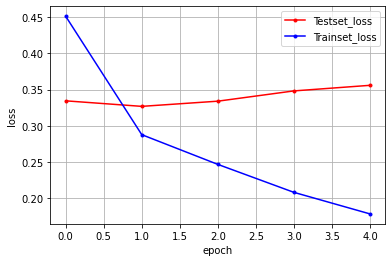

In [9]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()